# Creation of NFL Playoff Prediction Bayes Network

This notebook is specifically for creating the bayes network using aima-python, as used in past coursework.

_Note: For importing aima-python the current path was modified using os_

In [1]:
import sys
sys.path.insert(1, "/Users/user/Desktop/aima-python")

In [2]:
from probability4e import *

## Creating Bayes Network using probability4e

In [3]:
T, F = True, False
playoff_net = BayesNet([
    ('Defense_Avg_EPA_Pass_Rate', '', 0.620991253644314),
    ('DSRS', '', 0.491253644314868),
    ('Avg_Pass_Yds_PP', '', 0.287172011661807),
    ('OSRS', '', 0.307580174927113),
    ('Off_Avg_WPA_Pass', '', 0.290087463556851),
    ('Avg_Allowed_Pass_Yds_PP', '', 0.654518950437317),
    ('MoV', '', 0.154518950437317),
    ('Avg_Points_Allowed', ['Defense_Avg_EPA_Pass_Rate', 'DSRS'],
     {(T, T): 0.559055118, (T, F): 0.036789298, (F, T): 0.89047619, (F, F): 0.28}),
    ('Avg_Points_Scored', ['Avg_Pass_Yds_PP', 'OSRS'],
     {(T, T): 0.937062937, (T, F): 0.407407407, (F, T): 0.720588235, (F, F): 0.057007126}),
    ('SRS', ['Off_Avg_WPA_Pass', 'Avg_Allowed_Pass_Yds_PP'],
     {(T, T): 0.731884058, (T, F): 0.967213115, (F, T): 0.231511254, (F, F): 0.681818182}),
    ('PD', ['Avg_Points_Allowed', 'Avg_Points_Scored'],
     {(T, T): 0.504273504, (T, F): 0, (F, T): 1, (F, F): 0.315789474}),
    ('W-L%', ['SRS', 'MoV'],
     {(T, T): 0.962264151, (T, F): 0.508130081, (F, T): 0, (F, F): 0.038922156}),
    ('Playoffs', ['PD', 'W-L%'],
     {(T, T): 0.958762887, (T, F): 0.322580645, (F, T): 0.913043478, (F, F): 0.081927711})
])

### NFL Bayes Net Diagram

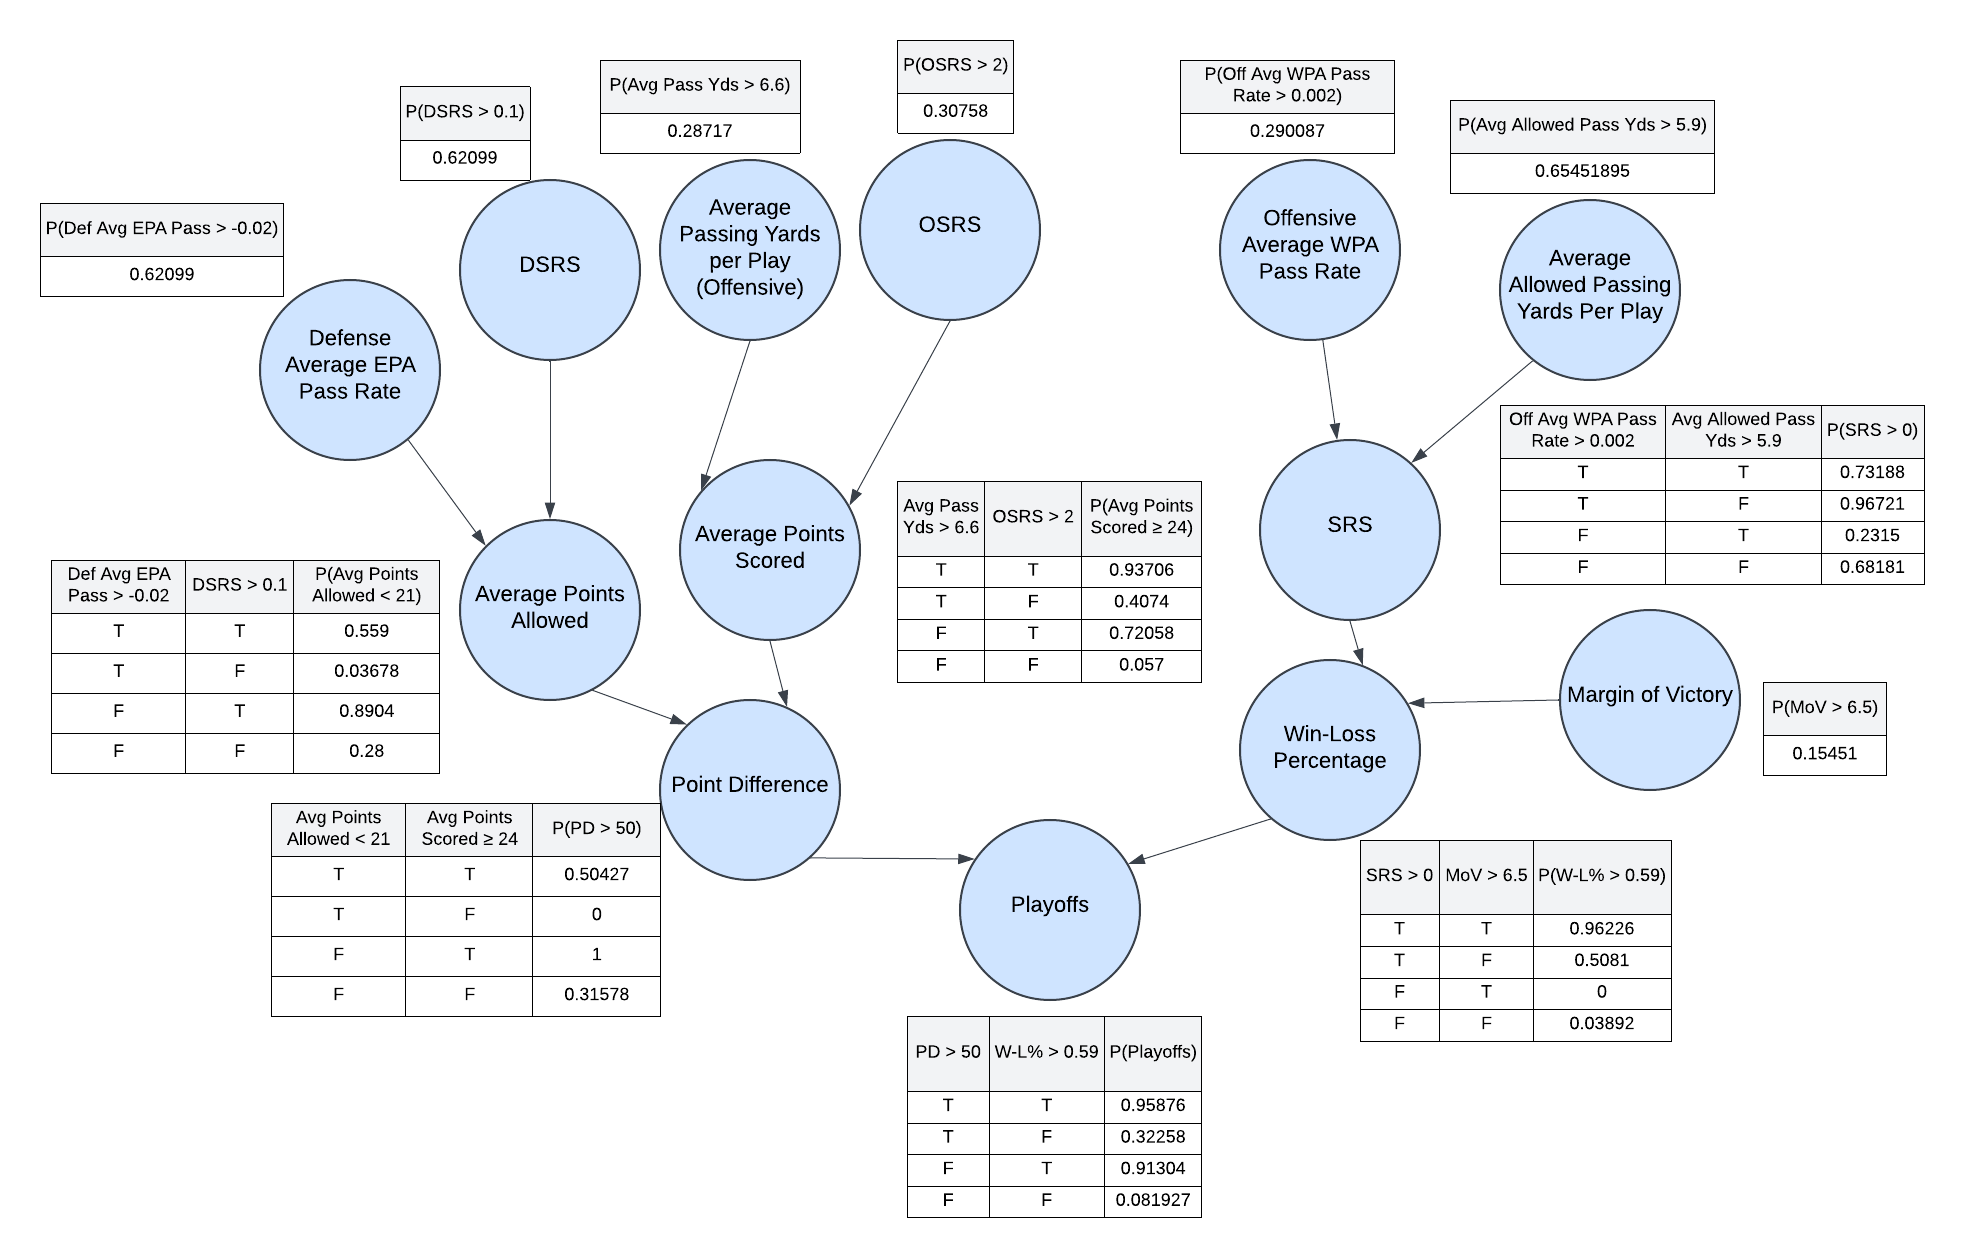

## Sensitivity Analysis

### How does changing Defense Average EPA Pass Rate impact the probability of Average Points allowed being below 21?

In football analytics, defensive metrics play a key role in determining a team's performance and chances of success. Defense Average EPA (Expected Points Added) Pass Rate measures how effective a team is at preventing opponents from gaining advantage through passing. A higher measure typically corresponds to a weaker defense.

This question focuses on understanding the relationship between this variable and the likelihood of a defense keeping their Average Points Allowed below 21 points per game. This threshold is often a benchmark for strong defensive teams, as it contributes to more success.

#### Scenario 1: Weak Defense Average EPA Pass Rate

In [4]:
enumeration_ask("Avg_Points_Allowed", {'Defense_Avg_EPA_Pass_Rate': T}, playoff_net)[True]

0.2933542853760929

#### Scenario 2: Strong Defense Average EPA Pass Rate (at or below -0.002)

In [5]:
enumeration_ask("Avg_Points_Allowed", {'Defense_Avg_EPA_Pass_Rate': F}, playoff_net)[True]

0.5798986531049557

These results highlight a stark difference in the defensive outcomes based on a team's Defense Average EPA Pass Rate. When a team has a weak Defense Average EPA Pass Rate, there is only a 29% chance of keeping the Average Points Allowed below 21. This suggests that weaker defensive performance in the passing game significantly reduces a team's ability to limit opponent scoring, which ultimately leads to more losses and decreased playoff chances.

Conversely, a strong Defense Average EPA Pass Rate contributes significantly to holding opponents below 21 points. With a 57%, this is nearly double that of a weak defense. This finding reveals the importance of an effective pass defense as a key factor in maintaining competitiveness and increasing the likelihood of winning games. 

### How much do average passing yards per play contribute to a team scoring at least 24 points? 

On the other side of the ball, this question focuses on the relationship between a team's average passing yards per play and their likelihood of achieving a high offensive output, specifically scoring at least 24 points in a game.

#### Scenario 1: Offense averages less than 6.6 passing yards per play

In [7]:
enumeration_ask("Avg_Points_Scored", {'Avg_Pass_Yds_PP': F}, playoff_net)[True]

0.26111151958454765

#### Scenario 2: Offense averages at least 6.6 passing yards per play

In [8]:
enumeration_ask("Avg_Points_Scored", {'Avg_Pass_Yds_PP': T}, playoff_net)[True]

0.5703189475685128

The results reveal a clear distinction: teams that average more than 6.6 passing yards per play have a 57% chance of scoring at least 24 points, while teams that fall below this threshold have only a 26% chance of reaching that mark.

The network yields similar results to the past example, revealing the importance of passing in driving either points for or points against. Higher passing yard averages per play not only indicate effective quarterback and receiver perfomance but also contribute significantly to sustaining drives, creating scoring opportunities.

### What is the likelihood that a strong team (above average SRS), that on average wins by less than 6.5 points makes it to the playoffs?

#### Scenario 1: Strong Team that wins close games

In [9]:
enumeration_ask("Playoffs", {'MoV': F, "SRS": T}, playoff_net)[True]

0.5613020477794607

#### Scenario 2: Strong Team that wins by more than 6.5 points on average

In [10]:
enumeration_ask("Playoffs", {'MoV': T, "SRS": T}, playoff_net)[True]

0.9030677796680242

A high SRS alone is not sufficient for playoff qualification. The addition of a high Margin of Victory (winning by more than 6.5 points on average) significantly boosts a team's playoff probability, demonstrating the importance of consistent and decisive wins. Teams with a strong SRS but low MoV likely win close games, which can be risky as they depend on other factors like turnovers or pure luck. This also restates the obvious assumption that a team that wins consistently is more likely to make the playoffs.

### How does OSRS above 2 affect a team's probability of averaging at least 24 points per game given they made it to the playoffs?

#### Scenario 1: Team with a strong offensive rating

In [11]:
enumeration_ask("Avg_Points_Scored", {"Playoffs":T, "OSRS":T}, playoff_net)[True]

0.8233740101463422

#### Scenario 2: Team with a weak offensive rating

In [12]:
enumeration_ask("Avg_Points_Scored", {"Playoffs":T, "OSRS":F}, playoff_net)[True]

0.19491850147488263

These results reveal that a team with an OSRS above 2 have an ~82% probability of averaging at least 24 points per game, given they made it to the playoffs. In contrast, a team with OSRS below 2 has only an 19% probability of achieving the same feat.

Teams that reach the playoffs typically have a higher offensive output. This result suggests that OSRS is key to differentiate between a strong offense that can score and one that doesn't. An OSRS above 2 appears to act as a critical threshold where a team transitions from having a small chance of being a high scoring playoff team to an overwhelming likelihood.

### How do low-scoring games affect playoff probabilities?

#### Scenario 1: An offense averages less than 24 points per game

In [13]:
enumeration_ask("Playoffs", {"Avg_Points_Scored":F}, playoff_net)[True]


0.3747502731554873

#### Scenario 2: An offense averages at least 24 points per game

In [14]:
enumeration_ask("Playoffs", {"Avg_Points_Scored":T}, playoff_net)[True]

0.48485484069114143

Given these results, the increase of 11% for making the playoffs is not as significant as expected. Throughout NFL history, there have been successful teams that rely more on their defense to offset a weak offense. The success of teams that compensate for offensive inefficiencies lies in their ability to excel in other areas of the game like turnovers, field position, etc.

This result underscores the importance of balance in football. While high powered-offenses can carry teams far, complementary defensive efficiency makes the difference throughout the season. These teams may find themselves in playoff contention due to their ability to keep games close.

In today's NFL, where scoring is often what makes a good team great, this insight serves as a reminder that defenses win championships. Teams like the 2015 Denver Bronces, who won the Super Bowl despite subpar offensive performances, demonstrate that a dominant defense can still be the cornerstone of success.

### Other Defensive factors that play important roles

So far, this analysis has mostly looked at offensive metrics and how they affect other variables, like playoff chances, points scored, etc. Points Allowed has been analyzed, however, it is necessary to dive deeper into how a strong defense influences other variables. After all, "defense wins championships".

### How does an unbalanced defense (strong against the run, weak against pass) contribute to a strong Win-Loss %?

#### Scenario 1: Weak Pass Defense

In [15]:
enumeration_ask("W-L%", {"Avg_Allowed_Pass_Yds_PP":T}, playoff_net)[True]

0.23833792886025523

#### Scenario 2: Strong Pass Defense

In [16]:
enumeration_ask("W-L%", {"Avg_Allowed_Pass_Yds_PP":F}, playoff_net)[True]


0.44992073149848555

A strong DSRS may not reflect a defense's full picture. This rating system potentially masks specific strengths and weaknesses. For example, a team with a high DSRS may excel at stopping the run while struggling against the pass. These defenses may rank well but remain vulnerable to stopping the pass. As can be seen from the results, allowing more than 5.9 passing yards on average diminishes a team's ability to produce a high winning record.

In the modern NFL, being weak against the pass can be a significant liability. Many of the best offenses in the game rely heavily on their passing games to extend drives and score points. Teams with a weak passing defense are at a significant disadvantage even if they can stop the run. While stopping the run remains an important aspect of a sound defense, its impact is often less critical in today's pass-heavy league. Opponents with a strong rushing offense often adjust their game to exploit a weak secondary, resulting in a higher passing efficiency. 

### If a defense allows less than 21 points per game on average, what is the probability of a low Defense EPA Pass Rate?

#### Scenario 1: Defense allows more than 21 points per game

In [17]:
enumeration_ask("Defense_Avg_EPA_Pass_Rate", {"Avg_Points_Allowed":T}, playoff_net)[False]

0.5467913310118062

#### Scenario 2: Defense allows less than 21 points per game

In [18]:
enumeration_ask("Defense_Avg_EPA_Pass_Rate", {"Avg_Points_Allowed":F}, playoff_net)[False]

0.26623857031525505

These results once again highlight the importance of a strong passing defense, as measured by Defense EPA Pass Rate. A strong passing defense has a hightened probability of allowing less than 21 points on average, which means teams can effectively limit the passing game and reduce the likelihood of big plays. Teams with a high Defense EPA Pass Rate consistenly rank among the league leaders in points allowed, showcasing this metric's reliability in predicting how well a defense does.

#### Given a high Point Difference (more than 50 points), what is the probability that a team has a strong defense (as measured by DSRS)?

In [19]:
enumeration_ask("DSRS", {"PD":T}, playoff_net)[True]

0.36071480668611167

#### What about a strong offense?

In [20]:
enumeration_ask("OSRS", {"PD":T}, playoff_net)[True]

0.5097428968368234

Although defense wins championships, this finding highlights the importance of balance on both sides of the ball. A stronger offense is more responsible for a high Point Differential as compared to a strong defense, as scoring is obviously important. This does not diminish the value of a robust defense but suggests that offenses serve as the primary driver of success.

#### Probability that either a team allows less than 5.9 passing yards or allows less than 21 points given that they made the playoffs?

In [22]:
low_allowed_yds = enumeration_ask("Avg_Allowed_Pass_Yds_PP", {"Playoffs":T}, playoff_net)[False]
low_allowed_points = enumeration_ask("Avg_Points_Allowed", {"Playoffs":T}, playoff_net)[False]

res = low_allowed_yds + low_allowed_points - (low_allowed_yds*low_allowed_points)
res

0.7944239903288103

The result indicates that there is a ~79% probability that a playoff team either allows less than 5.9 passing yards per play or allows fewer than 21 points on average. This proves the influence of defensive performance for making the playoffs and restates the value of a strong passing defense to win games.

## Team Examples

### Example 1: Looking at the 2024 San Francisco 49ers

The 2024 San Francisco 49ers have had a disappointing season: they have not lived to the league's expectations after making the Super Bowl in 2023 and have a depth chart full of injuries. Looking at data for their 2024 season, we can see that:

- Their SRS is -0.7
- Their W-L% is 0.41
- Points Scored are 270, Average Points Scored are 270 / 12 = 22.5
- Their defense allows 24.6 points per game on average
- Their defense average EPA Pass Rate is -0.05
- They allow an average of 6.7 passing yards per play

All else being equal, what is the probability they make the playoffs?

In [23]:
# SRS = F, W-L% = F, Points Scored = F, Points Allowed = F, Defense EPA Pass Rate = T
# Avg Allowed Passing Yards Allowed = T, OSRS = F, DSRS = F
niners_dic = {
    'Defense_Avg_EPA_Pass_Rate': T, "Avg_Allowed_Pass_Yds_PP": T, "OSRS": F, "DSRS": F,
    "SRS": F, "W-L%": F, "Avg_Points_Scored": F, "Avg_Points_Allowed": F
}
niners = enumeration_ask("Playoffs", niners_dic, playoff_net)[True]

In [24]:
niners

0.15792337444441676

According to this model, the 49ers have a 15% chance of making the playoffs, while other models say they have a 5-8% chance. As discussed in the limitations section of the README, there are other factors that influence if a team makes the playoffs like the strength of their division or of the conference in general.

### Example 2: The 2010 Seattle Seahawks

The 2010 Seattle Seahawks are a recent example of a team with a losing record making the playoffs. With a record of 7 wins and 9 losses, they won the Wild Card Round against New Orleans but later lost against the Bears. Although they advanced to the playoffs because they were division leaders, how does the model predict their probability of making the playoffs? Looking at their data, we can see that:

- Their Offensive Average WPA Pass Rate was -0.0015
- Their Average Allowed Passing Yards per Play was 6.4
- Their Point Differential was -97
- Their Margin of Victory was -6.1
- Their Defense Average EPA Pass Rate was 0.1
- Their Win-Loss percentafe was below 0.59

In [25]:
# Offense Average WPA = F, Average Allowed Passing Yards = T, PD = F, Defense EPA Pass Rate = T
# MoV = F, W-L% = F
hawks_dic = {
    'Defense_Avg_EPA_Pass_Rate': T, "Avg_Allowed_Pass_Yds_PP": T,
    "MoV": F, "W-L%": F, "Off_Avg_WPA_Pass": F, "PD": F
}
hawks = enumeration_ask("Playoffs", hawks_dic, playoff_net)[True]

In [26]:
hawks

0.08192771099999997

The 2010 Seahawks serve as a rare outlier in NFL history. This unique situation of a team making the playoffs with a losing record underscores the challenges faced by predictive models when dealing with edge cases or highly irregular data points. While the model's 8% playoff prediction aligns with the improbability of their playoff berth, it also demonstrates the need to consider context beyond purely numerical inputs.

### Limitations
The current prediction model is obviously not perfect, as per the limitations mentioned in the README document. There are other variables that influence a team making the playoffs like an easy division or reduced competition in the conference.